# pedestals_subtracted

Files that contain less than 84 rows:
163606_2015-09-19T12_02_38_2015-09-19T13_02_46_pedestal_sub_run_dump.csv
198150_2017-08-30T09_38_42_2017-08-30T10_34_20_pedestal_sub_run_dump.csv
198152_2017-08-30T11_00_50_2017-08-30T12_00_54_pedestal_sub_run_dump.csv
198154_2017-08-30T12_00_56_2017-08-30T13_01_05_pedestal_sub_run_dump.csv
198155_2017-08-30T13_01_07_2017-08-30T13_33_19_pedestal_sub_run_dump.csv
198156_2017-08-30T13_33_21_2017-08-30T14_11_55_pedestal_sub_run_dump.csv
198158_2017-08-30T14_11_57_2017-08-30T15_12_06_pedestal_sub_run_dump.csv
198163_2017-08-30T16_11_38_2017-08-30T17_11_46_pedestal_sub_run_dump.csv
198164_2017-08-30T17_11_49_2017-08-30T18_11_57_pedestal_sub_run_dump.csv
198165_2017-08-30T18_11_59_2017-08-30T19_12_07_pedestal_sub_run_dump.csv
198244_2017-08-31T15_30_40_2017-08-31T16_11_28_pedestal_sub_run_dump.csv
198245_2017-08-31T16_11_30_2017-08-31T17_11_36_pedestal_sub_run_dump.csv
198247_2017-08-31T17_26_27_2017-08-31T18_12_37_pedestal_sub_run_dump.csv
198285_2017-09-01T02_40_37_2017-09-01T03_19_59_pedestal_sub_run_dump.csv
198299_2017-09-01T06_06_45_2017-09-01T07_06_51_pedestal_sub_run_dump.csv
198300_2017-09-01T07_06_53_2017-09-01T08_07_02_pedestal_sub_run_dump.csv
198301_2017-09-01T08_07_04_2017-09-01T09_07_12_pedestal_sub_run_dump.csv
198304_2017-09-01T09_07_14_2017-09-01T09_44_14_pedestal_sub_run_dump.csv
198307_2017-09-01T09_44_16_2017-09-01T10_44_23_pedestal_sub_run_dump.csv
198308_2017-09-01T10_44_25_2017-09-01T11_38_19_pedestal_sub_run_dump.csv
198311_2017-09-01T12_32_32_2017-09-01T13_32_34_pedestal_sub_run_dump.csv
198312_2017-09-01T13_32_36_2017-09-01T14_08_40_pedestal_sub_run_dump.csv
200495_2017-10-14T02_59_11_2017-10-14T03_59_17_pedestal_sub_run_dump.csv
200496_2017-10-14T03_59_19_2017-10-14T04_59_28_pedestal_sub_run_dump.csv
200497_2017-10-14T04_59_30_2017-10-14T05_59_38_pedestal_sub_run_dump.csv
200498_2017-10-14T05_59_40_2017-10-14T06_59_49_pedestal_sub_run_dump.csv
200500_2017-10-14T07_01_37_2017-10-14T08_01_39_pedestal_sub_run_dump.csv
200501_2017-10-14T08_01_41_2017-10-14T09_01_49_pedestal_sub_run_dump.csv
200502_2017-10-14T09_01_51_2017-10-14T10_02_00_pedestal_sub_run_dump.csv
200503_2017-10-14T10_02_02_2017-10-14T11_02_10_pedestal_sub_run_dump.csv
201287_2017-10-27T06_56_52_2017-10-27T07_56_54_pedestal_sub_run_dump.csv
201289_2017-10-27T07_56_56_2017-10-27T08_57_04_pedestal_sub_run_dump.csv
201294_2017-10-27T09_57_17_2017-10-27T10_57_25_pedestal_sub_run_dump.csv
201295_2017-10-27T10_57_27_2017-10-27T11_57_35_pedestal_sub_run_dump.csv
209007_2018-05-23T02_51_55_2018-05-23T03_52_08_pedestal_sub_run_dump.csv

In [160]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import datetime, time

def count_outliers(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return len(np.where((ys > upper_bound) | (ys < lower_bound))[0])

def calculate_trend(data, timestamps):
    dates_numbers = []
    for date in timestamps:
        dates_numbers.append(time.mktime(date.timetuple()))

    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(np.array(dates_numbers).reshape(-1, 1), data)  # perform linear regression
    calculated_trend = linear_regressor.predict(np.array(dates_numbers).reshape(-1, 1)) # make predictions
    return calculated_trend

In [161]:
import glob

#import numpy as np
import matplotlib.pyplot as plt
import re
import datetime
import os


files_raw = glob.glob("D:/Praca Magisterska/nowe/pedestals_subtracted/2018/*.csv")
files_calib = glob.glob("D:/Praca Magisterska/nowe/Tell1CalibCsv/*.csv")

outliers = []
means = []
means_abs = []
stddevs = []
timestamps = []
for file in files_raw:
    data = pd.read_csv(file ,sep=' ', header=None, usecols=range(4,2053))
    timestamp = datetime.datetime.strptime(data.iloc[0][4], '%Y-%m-%dT%H:%M:%S')
    timestamps.append(timestamp)
    del data[4]
    mean = data.mean().mean()
    mean_abs = data.abs().mean().mean()
    stddev = data.stack().std()
    means.append(mean)
    means_abs.append(mean_abs)
    stddevs.append(stddev)
    outliers.append(count_outliers(data))

calib_timestamps = []
for file in files_calib:
    file_name = os.path.basename(file)
    file_name_timestamp = datetime.datetime.strptime(file_name, '%Y_%m_%d-%H_%M_%S.csv')
    if (file_name_timestamp > min(timestamps)) and (file_name_timestamp < max(timestamps)):
        calib_timestamps.append(file_name_timestamp)

In [162]:
calib_timestamps_copy = calib_timestamps.copy()
calib_timestamps_copy.append(datetime.datetime.now())
trends_means = []
trends_outliers = []
trends_means_abs = []
trends_stddevs = []
trends_timestamps = []
counter = 0
for calib_timestamp_index in range(len(calib_timestamps_copy)):
    trends_means.append([])
    trends_outliers.append([])
    trends_means_abs.append([])
    trends_stddevs.append([])
    trends_timestamps.append([])
    while (timestamps[counter] < calib_timestamps_copy[calib_timestamp_index]) & (counter < len(timestamps)-1):
        trends_means[calib_timestamp_index].append(means[counter])
        trends_outliers[calib_timestamp_index].append(outliers[counter])
        trends_means_abs[calib_timestamp_index].append(means_abs[counter])
        trends_stddevs[calib_timestamp_index].append(stddevs[counter])
        trends_timestamps[calib_timestamp_index].append(timestamps[counter])
        counter = counter + 1

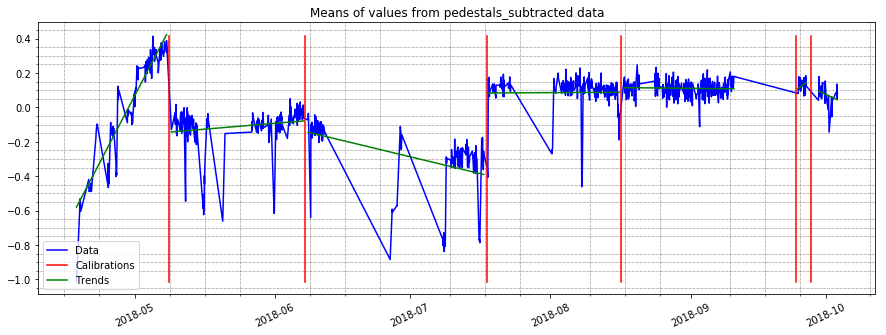

In [163]:
fig, ax = plt.subplots()
ax.set_title('Means of values from pedestals_subtracted data')
ax.plot(timestamps, means, 'b', label='Data')

for calib_timestamp in calib_timestamps:
    ax.plot([calib_timestamp, calib_timestamp], [min(means),max(means)], 'r', label='Calibrations')
    
for index in range(len(trends_timestamps)):
    trends_means[index] = calculate_trend(trends_means[index], trends_timestamps[index])
    ax.plot(trends_timestamps[index], trends_means[index], 'g', label='Trends')
    
plt.xticks(rotation=25)
plt.rcParams['figure.figsize'] = [15,5]
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.legend()
plt.show()

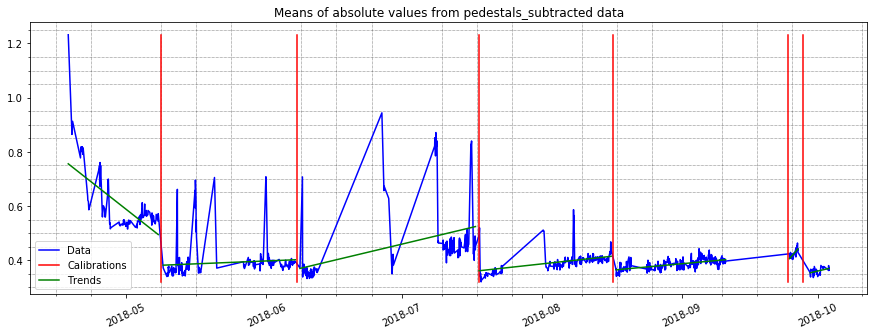

In [164]:
fig, ax = plt.subplots()
ax.set_title('Means of absolute values from pedestals_subtracted data')
ax.plot(timestamps, means_abs, 'b', label='Data')

for calib_timestamp in calib_timestamps:
    ax.plot([calib_timestamp, calib_timestamp], [min(means_abs),max(means_abs)], 'r', label='Calibrations')
    
for index in range(len(trends_timestamps)):
    trends_means_abs[index] = calculate_trend(trends_means_abs[index], trends_timestamps[index])
    ax.plot(trends_timestamps[index], trends_means_abs[index], 'g', label='Trends')
    
plt.xticks(rotation=25)
plt.rcParams['figure.figsize'] = [15,5]
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.legend()
plt.show()

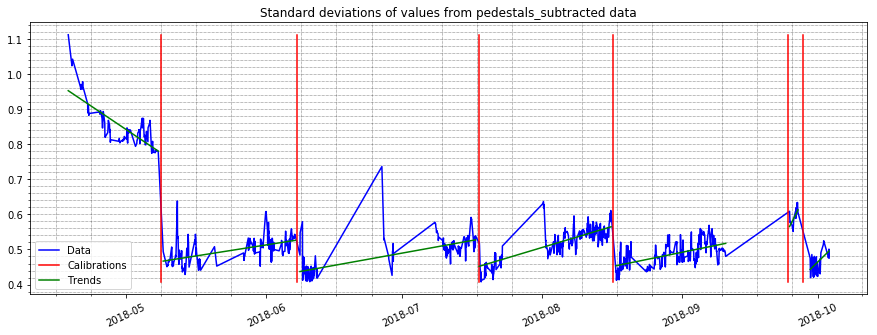

In [165]:
fig, ax = plt.subplots()
ax.set_title('Standard deviations of values from pedestals_subtracted data')
ax.plot(timestamps, stddevs, 'b', label='Data')

for calib_timestamp in calib_timestamps:
    ax.plot([calib_timestamp, calib_timestamp], [min(stddevs),max(stddevs)], 'r', label='Calibrations')
    
for index in range(len(trends_timestamps)):
    trends_stddevs[index] = calculate_trend(trends_stddevs[index], trends_timestamps[index])
    ax.plot(trends_timestamps[index], trends_stddevs[index], 'g', label='Trends')
    
plt.xticks(rotation=25)
plt.rcParams['figure.figsize'] = [15,5]
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.legend()
plt.show()

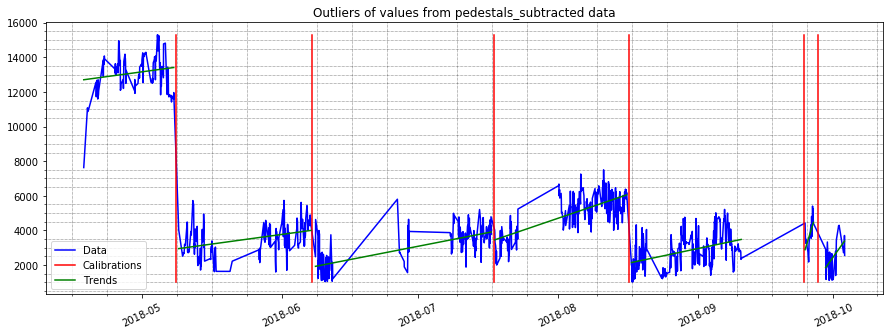

In [166]:
fig, ax = plt.subplots()
ax.set_title('Outliers of values from pedestals_subtracted data')
ax.plot(timestamps, outliers, 'b', label='Data')

for calib_timestamp in calib_timestamps:
    ax.plot([calib_timestamp, calib_timestamp], [min(outliers),max(outliers)], 'r', label='Calibrations')
    
for index in range(len(trends_timestamps)):
    trends_outliers[index] = calculate_trend(trends_outliers[index], trends_timestamps[index])
    ax.plot(trends_timestamps[index], trends_outliers[index], 'g', label='Trends')
    
plt.xticks(rotation=25)
plt.rcParams['figure.figsize'] = [15,5]
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.legend()
plt.show()

Weighted moving average:

In [167]:
number_of_elements = 10
moving_average = []
for index in range(len(means_abs)):
    elements = []
    for i in range(number_of_elements,0,-1):
        elements.append(means_abs[index-i])
        
    if index < 10:
        moving_average.append(means_abs[index])
    else:
        average = np.average(elements, weights=range(1,number_of_elements+1))
        moving_average.append(average)
        
calib_timestamp_index = 0
counter = 0
for index in range(len(means_abs)):
    if calib_timestamp_index >= len(calib_timestamps):
        break
    if timestamps[index] > calib_timestamps[calib_timestamp_index]:
        for i in range(0,number_of_elements):
            moving_average[index+1] = means_abs[index+i]
        calib_timestamp_index = calib_timestamp_index + 1
    

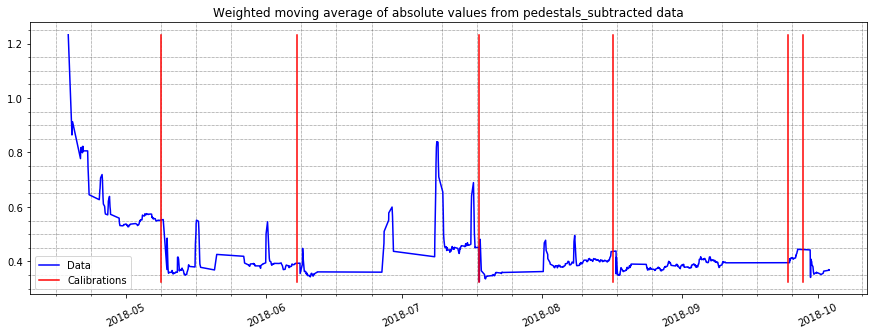

In [168]:
fig, ax = plt.subplots()
ax.set_title('Weighted moving average of absolute values from pedestals_subtracted data')
ax.plot(timestamps, moving_average, 'b', label='Data')

for calib_timestamp in calib_timestamps:
    ax.plot([calib_timestamp, calib_timestamp], [min(moving_average),max(moving_average)], 'r', label='Calibrations')
plt.xticks(rotation=25)
plt.rcParams['figure.figsize'] = [15,5]
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.legend()
plt.show()

In [169]:
moving_average_stddevs = []
for index in range(len(stddevs)):
    elements = []
    for i in range(number_of_elements,0,-1):
        elements.append(stddevs[index-i])
        
    if index < 10:
        moving_average_stddevs.append(stddevs[index])
    else:
        average = np.average(elements, weights=range(1,number_of_elements+1))
        moving_average_stddevs.append(average)
        
calib_timestamp_index = 0
counter = 0
for index in range(len(stddevs)):
    if calib_timestamp_index >= len(calib_timestamps):
        break
    if timestamps[index] > calib_timestamps[calib_timestamp_index]:
        for i in range(0,number_of_elements):
            moving_average_stddevs[index+1] = stddevs[index+i]
        calib_timestamp_index = calib_timestamp_index + 1

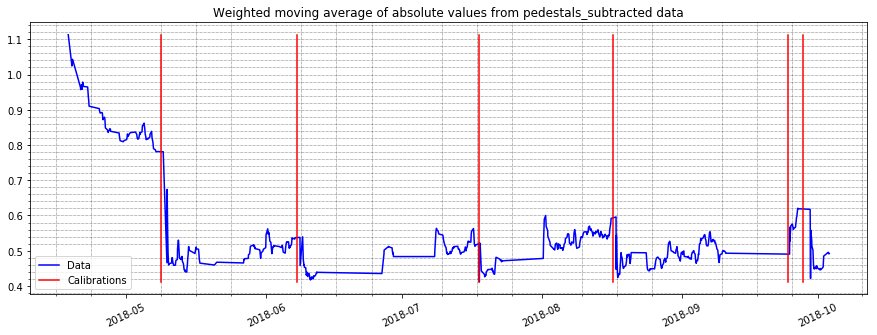

In [170]:
fig, ax = plt.subplots()
ax.set_title('Weighted moving average of absolute values from pedestals_subtracted data')
ax.plot(timestamps, moving_average_stddevs, 'b', label='Data')

for calib_timestamp in calib_timestamps:
    ax.plot([calib_timestamp, calib_timestamp], [min(moving_average_stddevs),max(moving_average_stddevs)], 'r', label='Calibrations')
plt.xticks(rotation=25)
plt.rcParams['figure.figsize'] = [15,5]
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.legend()
plt.show()

# Noise:

In [171]:
files_raw = glob.glob("D:/Praca Magisterska/nowe/noise/2018/*.csv")

means_noise = []
timestamps_noise = []
for file in files_raw:
    data = pd.read_csv(file ,sep=' ', header=None, usecols=range(4,2053))
    timestamp = datetime.datetime.strptime(data.iloc[0][4], '%Y-%m-%dT%H:%M:%S')
    timestamps_noise.append(timestamp)
    del data[4]
    mean = data.mean().mean()
    means_noise.append(mean)

In [172]:
calib_timestamps = []
for file in files_calib:
    file_name = os.path.basename(file)
    file_name_timestamp = datetime.datetime.strptime(file_name, '%Y_%m_%d-%H_%M_%S.csv')
    if (file_name_timestamp > min(timestamps_noise)) and (file_name_timestamp < max(timestamps_noise)):
        calib_timestamps.append(file_name_timestamp)

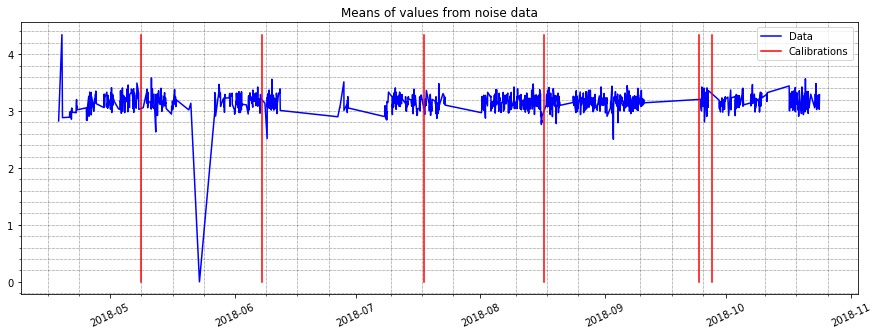

In [173]:
fig, ax = plt.subplots()
ax.set_title('Means of values from noise data')
ax.plot(timestamps_noise, means_noise, 'b', label='Data')

for calib_timestamp in calib_timestamps:
    ax.plot([calib_timestamp, calib_timestamp], [min(means_noise),max(means_noise)], 'r', label='Calibrations')
plt.xticks(rotation=25)
plt.rcParams['figure.figsize'] = [15,5]
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.legend()
plt.show()

File '208363_2018-05-16T10_17_51_2018-05-16T10_49_01_noise_run_dump.csv' contains only 0.00 values.
Noise level is constant.

# Pedestals

In [174]:
from sklearn.linear_model import LinearRegression
import datetime, time

means_pedestals = []
stddevs_pedestals = []
calib_timestamps_pedestals = []
for file in files_calib:
    file_name = os.path.basename(file)
    file_name_timestamp = datetime.datetime.strptime(file_name, '%Y_%m_%d-%H_%M_%S.csv')
    calib_timestamps_pedestals.append(file_name_timestamp)
    
    data = pd.read_csv(file ,sep=' ', header=None, usecols=range(2,2050), skiprows=range(84,350))
    mean_pedestals = data.mean().mean()
    stddev_pedestals = data.stack().std()
    means_pedestals.append(mean_pedestals)
    stddevs_pedestals.append(stddev_pedestals)

    
dates_numbers = []
for date in calib_timestamps_pedestals:
    dates_numbers.append(time.mktime(date.timetuple()))
    
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(np.array(dates_numbers).reshape(-1, 1), means_pedestals)  # perform linear regression
means_pedestals_trend = linear_regressor.predict(np.array(dates_numbers).reshape(-1, 1)) # make predictions

In [175]:
# Calculate trends
dates_numbers = []
for date in calib_timestamps_pedestals:
    dates_numbers.append(time.mktime(date.timetuple()))

# Means
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(np.array(dates_numbers).reshape(-1, 1), means_pedestals)  # perform linear regression
means_pedestals_trend = linear_regressor.predict(np.array(dates_numbers).reshape(-1, 1)) # make predictions

# Stddevs
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(np.array(dates_numbers).reshape(-1, 1), stddevs_pedestals)  # perform linear regression
stddevs_pedestals_trend = linear_regressor.predict(np.array(dates_numbers).reshape(-1, 1)) # make predictions

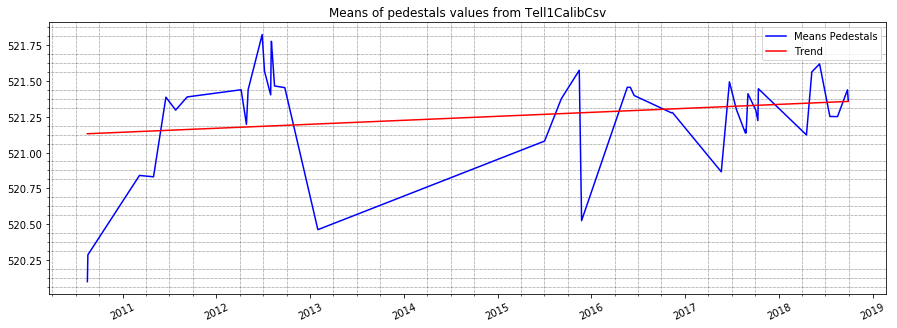

In [176]:
fig, ax = plt.subplots()
ax.set_title('Means of pedestals values from Tell1CalibCsv')
ax.plot(calib_timestamps_pedestals, means_pedestals, 'b', label='Means Pedestals')
ax.plot(calib_timestamps_pedestals, means_pedestals_trend, 'r', label='Trend')

plt.xticks(rotation=25)
plt.rcParams['figure.figsize'] = [15,5]
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.legend()
plt.show()

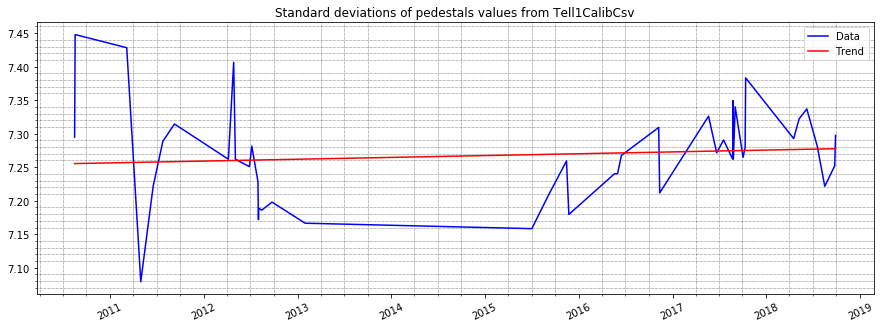

In [177]:
fig, ax = plt.subplots()
ax.set_title('Standard deviations of pedestals values from Tell1CalibCsv')
ax.plot(calib_timestamps_pedestals, stddevs_pedestals, 'b', label='Data')
ax.plot(calib_timestamps_pedestals, stddevs_pedestals_trend, 'r', label='Trend')

plt.xticks(rotation=25)
plt.rcParams['figure.figsize'] = [15,5]
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.legend()
plt.show()